In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, k, mu_0, pi

# Optimal Plasma Density

## Density Limit from plasma pressure
We recall that the plasma pressure can be expressed as
$$
\beta = C_\beta \frac{\hat n \hat T}{B^2}
$$
with $C_\beta=4 e \mu_0\times 10^{21}\approx 0.00805$, $\hat n$ expressed in $10^{19} m^{-3}$ and $\hat T$ in keV.

For the plasma to be magnetically confined, one must have $\beta < 1$, which lead to the following constraint on the density:
$$
\hat n < \frac{B^2}{C_\beta \hat T}
$$
This limit is plotted below for few temperature:


In [2]:
def n_lim(B, T=10):
    C_beta = 4*e*mu_0*1e21  # 0.0085
    return B**2 / (C_beta*T)

<IPython.core.display.Javascript object>


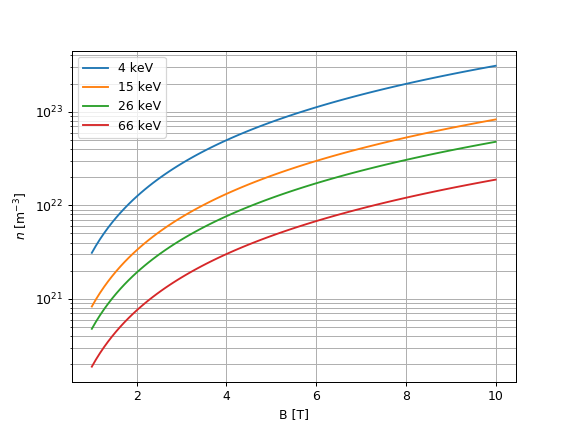

In [3]:
Ts = [4, 15, 26, 66]  # keV
Bs = np.linspace(1, 10, num=100) # T

fig, ax = plt.subplots()
[ax.semilogy(Bs, n_lim(Bs, T)*1e19, label=f'{T} keV') for T in Ts]
ax.legend()
ax.set_xlabel('B [T]')
ax.set_ylabel('$n$ [$\mathrm{m}^{-3}$]')
ax.grid(True)
ax.grid(True, which='minor', axis='both')

## Greenwald density

In [4]:
def n_G(B, q_a=3, R=6):
    C_n = 10/pi
    C_I = 2*pi*1e-6/mu_0
    n_G = C_n * C_I * B/q_a/R

# Optimal Plasma Temperature

Equalling net and loss power expression leads to:
\begin{equation}
n \tau_E 
\geqslant
C_{lawson}
\frac{Q}{1+Q/\lambda}
\frac{\hat T }{\left< \sigma v \right>_{DT} }
\end{equation} 


The D-T fusion reactivity depends of the temperature and peaks around $T \approx 66.5$ keV. Few empirical formulas or tabulations have been proposed, which can be found for instance the Bosch-Hale parametrization [Hartwig2016] or the Brunelli [FusionCEA1987]:

\begin{equation}
\left< \sigma v \right>_{DT} \approx 9.10^{-22}
\exp\left\{ -0.476 \left| \ln\frac{\hat T}{69} \right|^{2.25}\right\}
\;\;\;\textrm{m}^3.\textrm{s}^{-1}
\end{equation}

## $n \tau_E$ versus temperature

In [5]:
def avg_sigmav_DT(T_keV):
    'return the average D-T fusion reactivity in m^3/s'
    return 9e-22 * np.exp(-0.476 * np.abs(np.log(T_keV/69))**2.25)

def ntau_e(T_keV, Q=10, lambd=4.94, gamma_rad=1):
    E_DT_MeV = 17.59 # MeV
    E_DT = 2.82e-12 # J
    C_lawson = 12*1e3*e/E_DT
    return C_lawson * Q/(1+Q/lambd) * T_keV/ avg_sigmav_DT(T_keV) /gamma_rad

def ntau_e_rad(T_keV):
    C_B = 5.355e-37
    return 3*e*1e3/C_B*np.sqrt(T_keV)

<IPython.core.display.Javascript object>


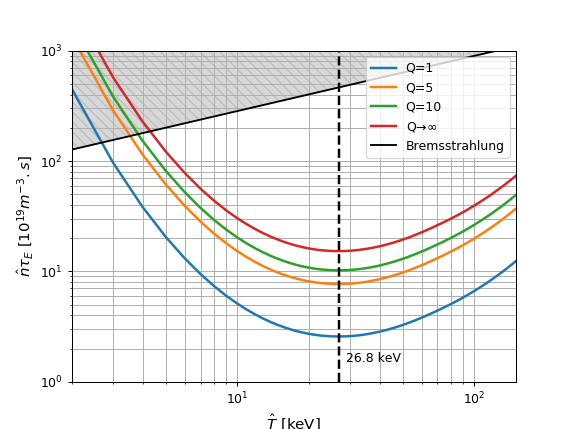

(2, 150)

In [6]:
T_keV = np.linspace(2, 150, num=150)
ntau_Q1 = ntau_e(T_keV, Q=1)
ntau_Q5 = ntau_e(T_keV, Q=5)
ntau_Q10 = ntau_e(T_keV, Q=10)
ntau_Qinf = ntau_e(T_keV, Q=1000000)

T_opt = T_keV[np.argmin(ntau_Q10)]

fig, ax = plt.subplots()
ax.loglog(T_keV, ntau_Q1/1e19, lw=2, label='Q=1')
ax.loglog(T_keV, ntau_Q5/1e19, lw=2, label='Q=5')
ax.loglog(T_keV, ntau_Q10/1e19, lw=2, label='Q=10')
ax.loglog(T_keV, ntau_Qinf/1e19, lw=2, label=r'Q$\to \infty$')

ax.loglog(T_keV, ntau_e_rad(T_keV)/1e19, color='k', label='Bremsstrahlung')

#fb = ax.fill_between(T_keV, y1=ntau_Q10/1e19, y2=100, color='grey', alpha=0.2, zorder=0)
#fb.set_hatch("//")

fb = ax.fill_between(T_keV, y1=ntau_e_rad(T_keV)/1e19, y2=1e3, color='grey', alpha=0.3)
fb.set_hatch('\\\\\\')


ax.grid(True)
ax.grid(True, which='minor')
ax.set_xlabel('$\hat T$ [keV]', fontsize=12)
ax.set_ylabel(r'$\hat n \tau_E$ [$10^{19} m^{-3}.s$]', fontsize=12)
ax.set_ylim(1, 1000)
ax.legend(loc='upper right')
ax.axvline(T_opt, ls='--', color='k', lw=2)
ax.text(T_opt+2, 1.5, f'{T_opt:.1f} keV')
ax.set_xlim(2, 150)


In [7]:
fig.savefig('ntau_e_vs_T_loglog.png', dpi=150)

## Bremsstrahlung radiation

<IPython.core.display.Javascript object>


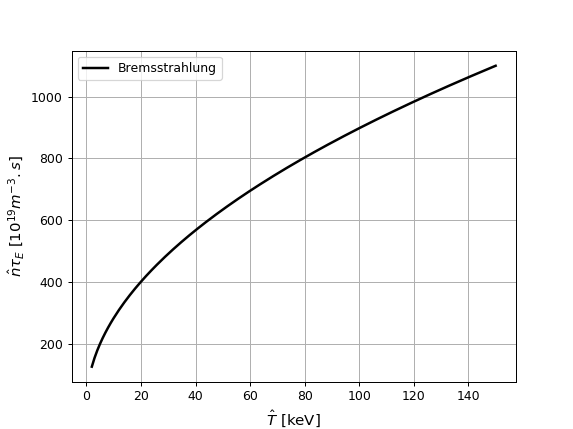

In [8]:
fig, ax = plt.subplots()
ax.plot(T_keV, ntau_e_rad(T_keV)/1e19, color='k', lw=2, label='Bremsstrahlung')
ax.grid(True)
ax.grid(True, which='minor')
ax.set_xlabel('$\hat T$ [keV]', fontsize=12)
ax.set_ylabel(r'$\hat n \tau_E$ [$10^{19} m^{-3}.s$]', fontsize=12)
ax.legend()

## Role of the radiation factor

<IPython.core.display.Javascript object>


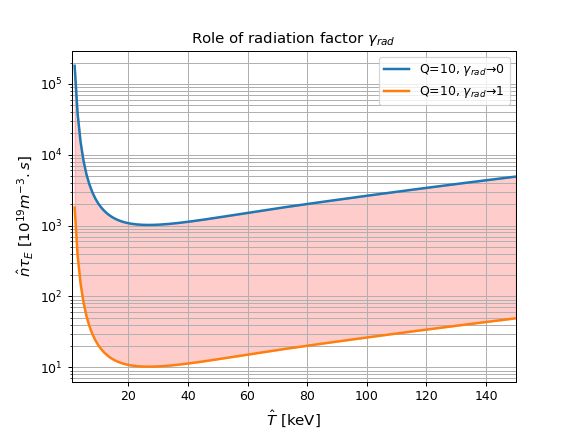

Text(0.5, 1.0, 'Role of radiation factor $\\gamma_{rad}$')

In [9]:
T_keV = np.linspace(2, 150, num=150)
ntau_Q10_rad_0 = ntau_e(T_keV, Q=10, gamma_rad=0.01)
ntau_Q10_rad_1 = ntau_e(T_keV, Q=10, gamma_rad=1)

fig, ax = plt.subplots()
ax.semilogy(T_keV, ntau_Q10_rad_0/1e19, lw=2, label=r'Q=10, $\gamma_{rad} \to 0$')
ax.semilogy(T_keV, ntau_Q10_rad_1/1e19, lw=2, label=r'Q=10, $\gamma_{rad} \to 1$')
ax.fill_between(T_keV, ntau_Q10_rad_0/1e19, ntau_Q10_rad_1/1e19, color='red', alpha=0.2)
ax.grid(True)
ax.grid(True, which='minor')
ax.set_xlabel('$\hat T$ [keV]', fontsize=12)
ax.set_ylabel(r'$\hat n \tau_E$ [$10^{19} m^{-3}.s$]', fontsize=12)
#ax.set_ylim(1, 100)
ax.legend(loc='upper right')
ax.set_xlim(1, 150)
ax.set_title('Role of radiation factor $\gamma_{rad}$')

### Stylin'

In [10]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
    styles = open(css_file_path, 'r').read()
    s = '<style>%s</style>' % styles
    return HTML(s)
_set_css_style('custom.css')